<a href="https://colab.research.google.com/github/NN2777/Phyton-Image-Processing/blob/main/Praktikum_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Gamma Correction pada citra
---------------------------------
Masukkan nilai Gamma: 3


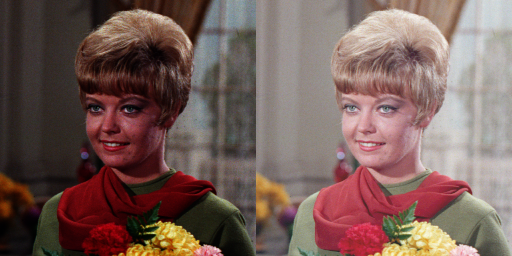

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print('Gamma Correction pada citra')
print('---------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  ('Error, not a number')

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma
 
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)
 
    return cv.LUT(src, table)

img = cv.imread("/content/drive/MyDrive/koceng/female.tiff")
gammaImg = gammaCorrection(img, gamma)

final_frame = cv.hconcat((img, gammaImg))
cv2_imshow(final_frame)

Bit depth
---------------------------------
Masukkan nilai bit depth: 2


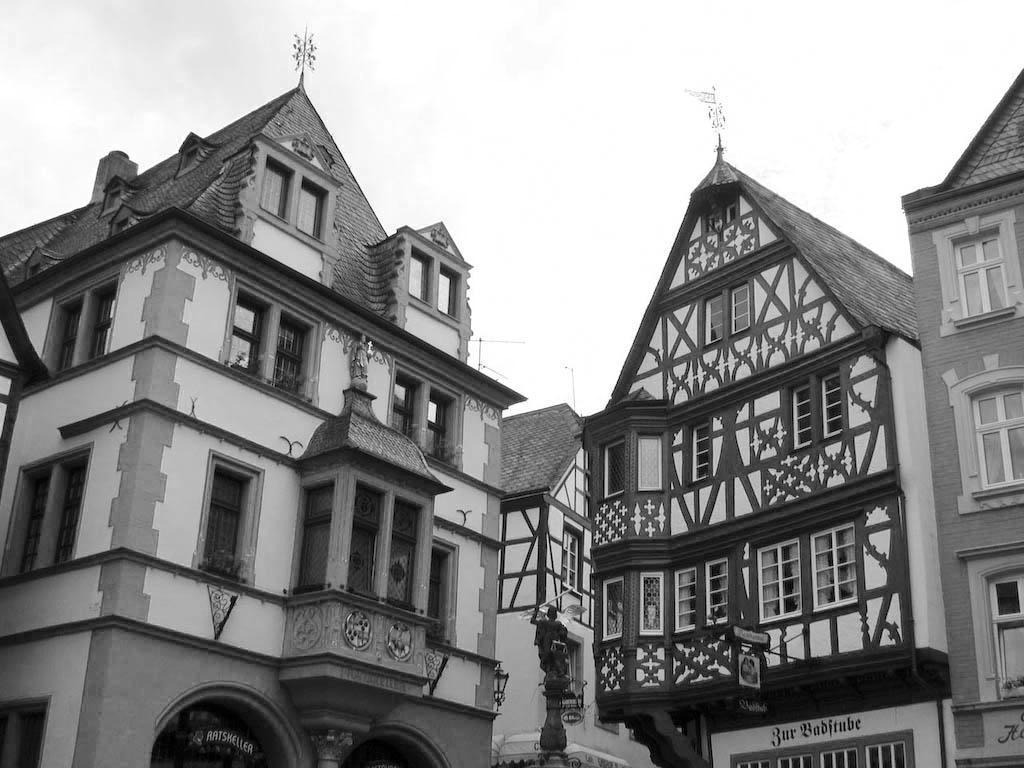

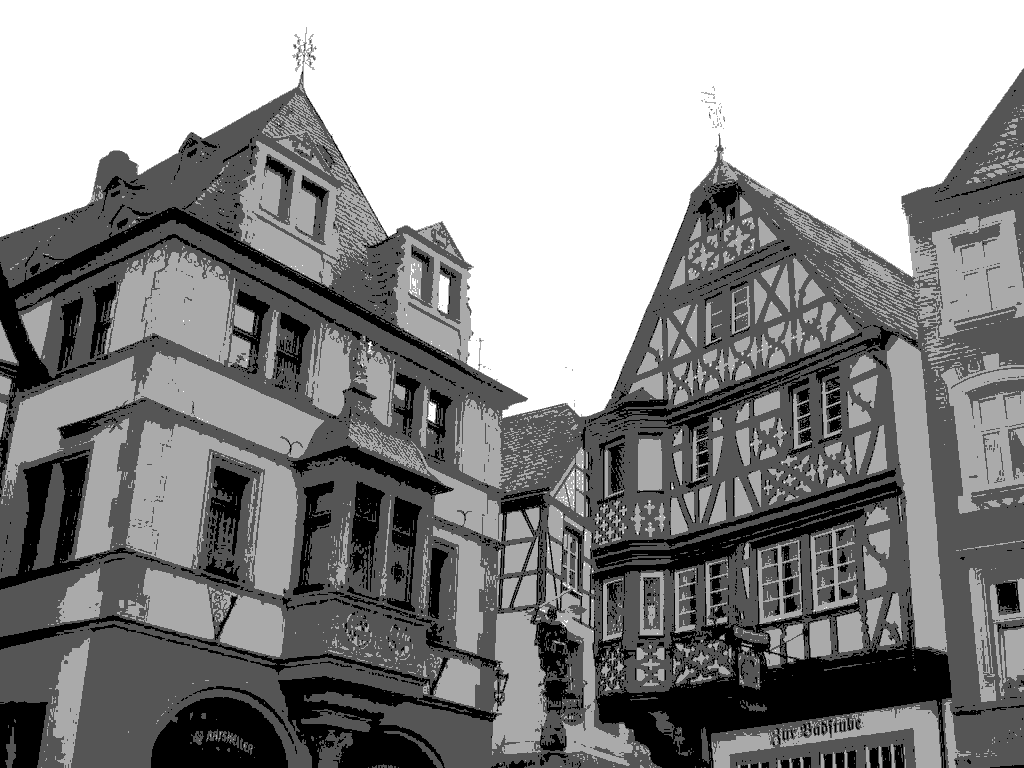

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

imageTest1 = cv.imread("/content/drive/MyDrive/koceng/old_house.jpg")

print('Bit depth')
print('---------------------------------')
try:
  depth = int(input('Masukkan nilai bit depth: '))
except ValueError:
  ('Error, not a number')

def bit_Depth(img, depth):

  level = 255/((2**depth)-1)
  new_image = np.zeros(img.shape, img.dtype)

  #INI CARANYA NGEAKSES WARNA PIKSEL
  for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      for c in range(img.shape[2]):
        new_image[x,y,c] = np.clip(round(img[x,y,c]/level)*level, 0, 255)

  return new_image;

ResultTest1 = bit_Depth(imageTest1, depth)
cv2_imshow(imageTest1)
cv2_imshow(ResultTest1)




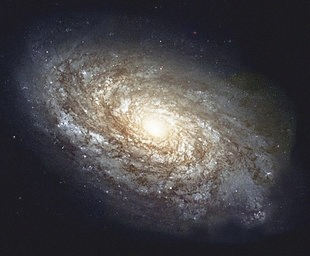

19.758103834326967


In [8]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import glob
from math import log10, sqrt

cv_img = []
for img in glob.glob('/content/drive/MyDrive/koceng/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

tot = np.average(cv_img[1:5], axis=0)

cv2_imshow(tot)

original = cv.imread('/content/drive/MyDrive/koceng/galaxy.jpg')
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

ad = PSNR(original, tot)
print(ad)

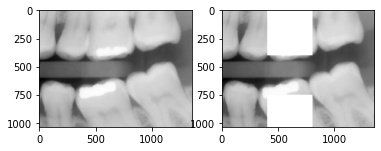

In [15]:
import matplotlib.pyplot as plt

teeth = cv.imread('/content/drive/MyDrive/koceng/teeth.jpg')
#show and find the shape of image 

#Create Or masking
box = np.zeros(teeth.shape, dtype=np.uint8)
#Creating 2 box area for masking
box1 = cv.rectangle(box,(400,0),(800,400),color=(255,255,255),thickness=-1)
box2 = cv.rectangle(box1,(400,750),(800,1036),color=(255,255,255),thickness=-1)
# Doing the bitwise or operation
result_or = cv.bitwise_or(teeth, box2)

fig, frame = plt.subplots(1,2)
frame[0].imshow(teeth)
frame[1].imshow(result_or)

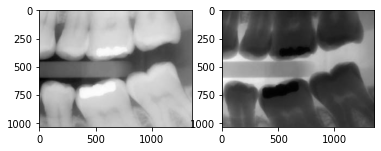

In [11]:
#Create not masking
box = np.zeros(teeth.shape, dtype=np.uint8)
#Creating 2 box area for masking
box1 = cv.rectangle(box,(400,0),(800,400),color=(255,255,255),thickness=-1)
box2 = cv.rectangle(box1,(400,750),(800,1036),color=(255,255,255),thickness=-1)
# Doing the bitwise or operation
result_not = cv.bitwise_not(teeth, box2)

fig, frame = plt.subplots(1,2)
frame[0].imshow(teeth)
frame[1].imshow(result_not)

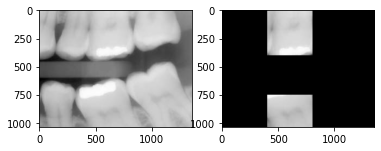

In [12]:
#Create and masking
box = np.zeros(teeth.shape, dtype=np.uint8)
#Creating 2 box area for masking
box1 = cv.rectangle(box,(400,0),(800,400),color=(255,255,255),thickness=-1)
box2 = cv.rectangle(box1,(400,750),(800,1036),color=(255,255,255),thickness=-1)
# Doing the bitwise and operation
result_and = cv.bitwise_and(teeth, box2)

fig, frame = plt.subplots(1,2)
frame[0].imshow(teeth)
frame[1].imshow(result_and)

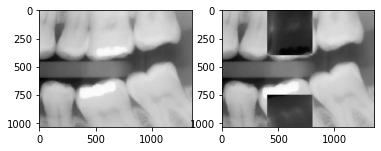

In [13]:
#Create xor masking
box = np.zeros(teeth.shape, dtype=np.uint8)
#Creating 2 box area for masking
box1 = cv.rectangle(box,(400,0),(800,400),color=(255,255,255),thickness=-1)
box2 = cv.rectangle(box1,(400,750),(800,1036),color=(255,255,255),thickness=-1)
# Doing the bitwise xor operation
result_or = cv.bitwise_xor(teeth, box2)

fig, frame = plt.subplots(1,2)
frame[0].imshow(teeth)
frame[1].imshow(result_or)

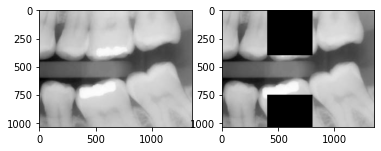

In [14]:
#Create nand masking
box = np.zeros(teeth.shape, dtype=np.uint8)
#Creating 2 box area for masking
box1 = cv.rectangle(box,(400,0),(800,400),color=(255,255,255),thickness=-1)
box2 = cv.rectangle(box1,(400,750),(800,1036),color=(255,255,255),thickness=-1)
# Doing the bitwise nand operation
result_or = teeth & ~box2

fig, frame = plt.subplots(1,2)
frame[0].imshow(teeth)
frame[1].imshow(result_or)

In [6]:
p = 255/15

print(p)

f = round(2/15)

print(f)

17.0
0
